# Visit the Sage site for more info: https://sagecontinuum.org

In [1]:
# Install requirements
! pip install --no-cache-dir -r requirements.txt -q

In [2]:
# Modify os.environ to avoid an issue with the default cache dir
import os
os.environ["MPLCONFIGDIR"] = "./"

In [3]:
import sage_data_client
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.width = 120

In [4]:
# Get the last N hours of temperature data
df = sage_data_client.query(
    start="-12h",
    filter={
        "name": "env.temperature",
        "sensor": "bme680",
        "zone": "shield",
    }
)

In [5]:
print(df)

                                timestamp             name  value                meta.host   meta.job  \
0     2024-09-09 12:42:51.588993865+00:00  env.temperature  16.72  0000d83add0dbcb6.ws-rpi  Pluginctl   
1     2024-09-09 12:43:21.593919546+00:00  env.temperature  16.74  0000d83add0dbcb6.ws-rpi  Pluginctl   
2     2024-09-09 12:43:51.607194830+00:00  env.temperature  16.79  0000d83add0dbcb6.ws-rpi  Pluginctl   
3     2024-09-09 12:44:21.637032115+00:00  env.temperature  16.87  0000d83add0dbcb6.ws-rpi  Pluginctl   
4     2024-09-09 12:44:51.665601866+00:00  env.temperature  16.89  0000d83add0dbcb6.ws-rpi  Pluginctl   
...                                   ...              ...    ...                      ...        ...   
57367 2024-09-10 00:40:23.191562086+00:00  env.temperature  24.55  0000e45f014524c6.ws-rpi  Pluginctl   
57368 2024-09-10 00:40:53.198759775+00:00  env.temperature  24.55  0000e45f014524c6.ws-rpi  Pluginctl   
57369 2024-09-10 00:41:23.215666486+00:00  env.temperat

W014
W016
W017
W019
W01A has suspicious data, skipping
W01B
W022
W023
W026
W028


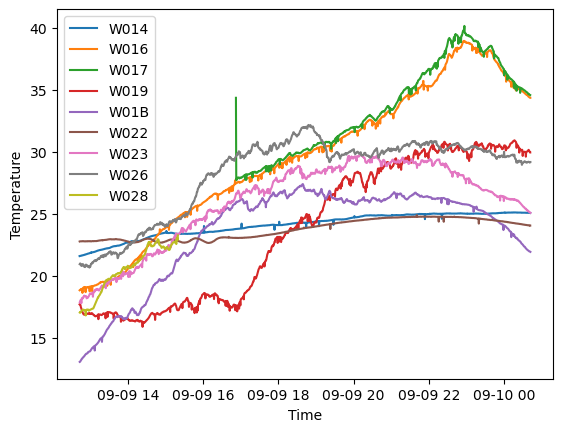

In [6]:
# Plot a few temperatures as time series
# Group by sensor (meta.vsn)
max_sensors = 10
fig, ax = plt.subplots()

for i, (vsn, group) in enumerate(df.groupby("meta.vsn")):

    if i >= max_sensors:
        break

    if group["value"].mean() < -100:
        print(f"{vsn} has suspicious data, skipping")
        continue

    print(vsn)
    ax.plot(group["timestamp"], group["value"], label=vsn)

leg = ax.legend()
xlabel = ax.set_xlabel("Time")
ylabel = ax.set_ylabel("Temperature")